---


**If using CoLab download your data and any necessarey python libraries:**

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/Backyard_colors.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/sts_nasa.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/Spectrum.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_color.gif'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/backyard.jpg'


    #https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx


    #!pip install ipywidgets
    #!pip install --upgrade scikit-learn


![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/sts_nasa.png?raw=1)


# **Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer**

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site,

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better".

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range.

>![image](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/Spectrum.png?raw=1)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent.

>
>![image](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_color.gif?raw=1)
>



### Load Python requirments:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, FloatRangeSlider, Layout

---
---

# **Test : Backyard Grass and Shoreline (at end of data) in continous mode of recording.**

Readings taken in February where much of the grass was brown indicative of winter dormancy.

![image.png](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/backyard.jpg?raw=1)


# **1) Load the Excel data file in xlsx format collected on the STELLA-Q2 micro SD card:**
---

You will notice that we add a few additional columns to these data:
- One column is called "Test" that is label for our STELLA target for that reading
- We have another column called "ImageName" that is that path and file name to any photos representing that reading - optional
- We also have added a column called "Test_number" used for time series plotting - optional

In [5]:
#read the file
file = r'data_white_grass_shade_whiteshade.xlsx'
df = pd.read_excel(file,index_col=False)


# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()

df.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192947Z,19.4964,20,20,...,900,10,5217.29,626.075,940,10,3449.99,413.999,4.16,98
1,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192949Z,19.4969,20,20,...,900,10,5314.53,637.744,940,10,3517.93,422.152,4.16,98
2,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192950Z,19.4972,20,20,...,900,10,5423.45,650.814,940,10,3606.17,432.740,4.16,98
3,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192952Z,19.4978,20,20,...,900,10,5565.70,667.884,940,10,3707.64,444.917,4.16,98
4,STELLA-Q2,2.4.0,6858,White Card Full Sun,1,Friday,20240209T192953Z,19.4980,20,20,...,900,10,5476.79,657.215,940,10,3658.23,438.987,4.16,98


# **2) Read in only the _First Line_ of average White-Card data for full-sun normailzation:**
---


In [6]:
#read the file
file = r'data_white_FullSun.xlsx'


white = pd.read_excel(file,index_col=False, nrows=1)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,avg,2.4.1,6857,White Card Full Sun,0,Thursday,20240209T192947Z,19.4964,20,20,...,900,10,5487.67,658.520346,940,10,3653.816154,438.457769,4.16,98


# **3) Define the colors and labels for the STELLA Test Patterns for this project in the cell below:**
---
**This is Test Case specific for your data.**

In [7]:
# Define Name and Colors for each unique value in the 'Test' column
test_colors = {
            'White Card Full Sun':'lightgray',
            'Grass':'limegreen',
            'Shady Grass':'yellow',
            'White Card Shade':'gray',
            'Mud Bank':'brown',
            }


# Explore the data:

In [8]:
df.describe()

,UID,batch,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,irradiance_410nm_purple_wavelength_nm,irradiance_410nm_purple_wavelength_uncertainty_nm,irradiance_410nm_purple_irradiance_uW_per_cm_squared,irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared,irradiance_435nm_blue_wavelength_nm,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
count,163.0,163.000000,163.000000,163.0,163.0,163.0,163.0,163.000000,163.000000,163.0,...,163.0,163.0,163.000000,163.000000,163.0,163.0,163.000000,163.000000,163.000000,163.000000
mean,6858.0,3.889571,19.625006,20.0,20.0,410.0,10.0,3023.136043,362.776393,435.0,...,900.0,10.0,2494.441558,299.332933,940.0,10.0,1607.297123,192.875626,4.159325,97.251534
std,0.0,6.125242,0.264935,0.0,0.0,0.0,0.0,3658.277876,438.993520,0.0,...,0.0,0.0,1547.934432,185.752123,0.0,0.0,1019.942264,122.393000,0.002516,0.435232
min,6858.0,1.000000,19.496400,20.0,20.0,410.0,10.0,220.380000,26.446000,435.0,...,900.0,10.0,318.961000,38.275000,940.0,10.0,187.941000,22.553000,4.150000,97.000000
25%,6858.0,2.000000,19.519300,20.0,20.0,410.0,10.0,1241.865000,149.024500,435.0,...,900.0,10.0,1413.650500,169.638500,940.0,10.0,931.319000,111.758500,4.160000,97.000000
50%,6858.0,2.000000,19.537200,20.0,20.0,410.0,10.0,1658.380000,199.005000,435.0,...,900.0,10.0,2459.440000,295.133000,940.0,10.0,1535.290000,184.235000,4.160000,97.000000
75%,6858.0,2.000000,19.555100,20.0,20.0,410.0,10.0,1792.815000,215.138000,435.0,...,900.0,10.0,2707.000000,324.840000,940.0,10.0,1656.175000,198.740500,4.160000,97.500000
max,6858.0,23.000000,20.450000,20.0,20.0,410.0,10.0,11522.700000,1382.720000,435.0,...,900.0,10.0,5678.500000,681.420000,940.0,10.0,3776.460000,453.175000,4.160000,98.000000


# Plot over a Continuous Sample Range:

In [9]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))


def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                #color = 'black'  # Default color for wavelengths not explicitly defined
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value


                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,1500)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 162), description='Timestamp Range', layout=Layout(width='90%')…


![image](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/Backyard_colors.png?raw=1)

---
---
---
# **White-Card Corrections to Normalize Spectral Data:**

## White reading (first reading) and then calibrate all readings to this white card reading:

In [10]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    testb = white['Test'][start_timestamp_index]
    teste = white['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in white.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(white[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=4, color='white')

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,30000)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"White and Gray Card Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(white) - 1), min=0, max=len(white) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 0), description='Timestamp Range', layout=Layout(width='90%'), …

## **In the above plot for our white standard, there is quite a range of magnitudes across what should be a uniform white specrtum. This is probably related to instrument detector bias. 

Our STS STELLA instrument always has a strong peak at 610nm.**

---
---
# **Normalize all STELLA-Q2 Readings to our White-Card Calibration data**


In [11]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aquamarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading

    #print()
    #print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')

    #print()
    #print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')


scaling_factor_save = []
# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor
    scaling_factor_save.append(scaling_factor)

print('scaling_factor_save:',scaling_factor_save)

#print()
#print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors

k=0
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor} \tline {k}")
    k=k+1


#print([scaling_factors[factor] for wavelength in wavelengths])

scaling_factor_save: [8.814966728586158e-05, 5.252377761513363e-05, 4.340052457880208e-05, 4.635669371936334e-05, 5.007232562264456e-05, 5.5224386239357356e-05, 8.129872842534995e-05, 8.112992770699367e-05, 3.3665695756633266e-05, 9.884329019812148e-05, 3.835187818735453e-05, 0.00011072719060331583, 4.5820460280622114e-05, 4.984498210565142e-05, 4.249404061939968e-05, 4.3304059788916017e-05, 0.00018222670094958333, 0.00027368645763617855]

Scaling Factors:
4) These are our final wavelength and scaling factors per wavelength 410nm: 8.814966728586158e-05 	line 0
4) These are our final wavelength and scaling factors per wavelength 435nm: 5.252377761513363e-05 	line 1
4) These are our final wavelength and scaling factors per wavelength 460nm: 4.340052457880208e-05 	line 2
4) These are our final wavelength and scaling factors per wavelength 485nm: 4.635669371936334e-05 	line 3
4) These are our final wavelength and scaling factors per wavelength 510nm: 5.007232562264456e-05 	line 4
4) These 

# White Card Corrected Spectral Data Over a Range of Readings:

In [12]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]



            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor


            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,1050)
    plt.ylim(0,1.1)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Add a Boost component to Shady or Cloudy White Card readings
#boost_slider = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description='Boost',orientation='horizontal',layout=Layout(width='90%'))


# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 162), description='Timestamp Range', layout=Layout(width='90%')…


![image](https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/Backyard_colors.png?raw=1)

---
---

# **NDVI:**
---

### Calculations of NDVI, NIRv...:


        NDVI = ( NIR  -  Red )   /  ( NIR  +  Red )

        NDVI = (860nm  -  645nm)  / (860nm  + 6 45nm)
        
        
    Testing use of NIRv in certain situations related to phenology of plant cylcles:
        
        NIRv = NDVI * NIR = NDVI * 860nm
        
        
**NDVI and now NIRv can be very good attributes to be used to differentiate Vegetative species.**

## Define Red and NIR Spectral Channels.

In [13]:
# Calculate NDVI and NIRv                                                          Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
nirv_values =   ndvi_values * nir_channel
test_number =   df['Test']
df['NDVI']  =   ndvi_values
df['NIRv']  =   nirv_values

## Plot NDVI as a Time Series.

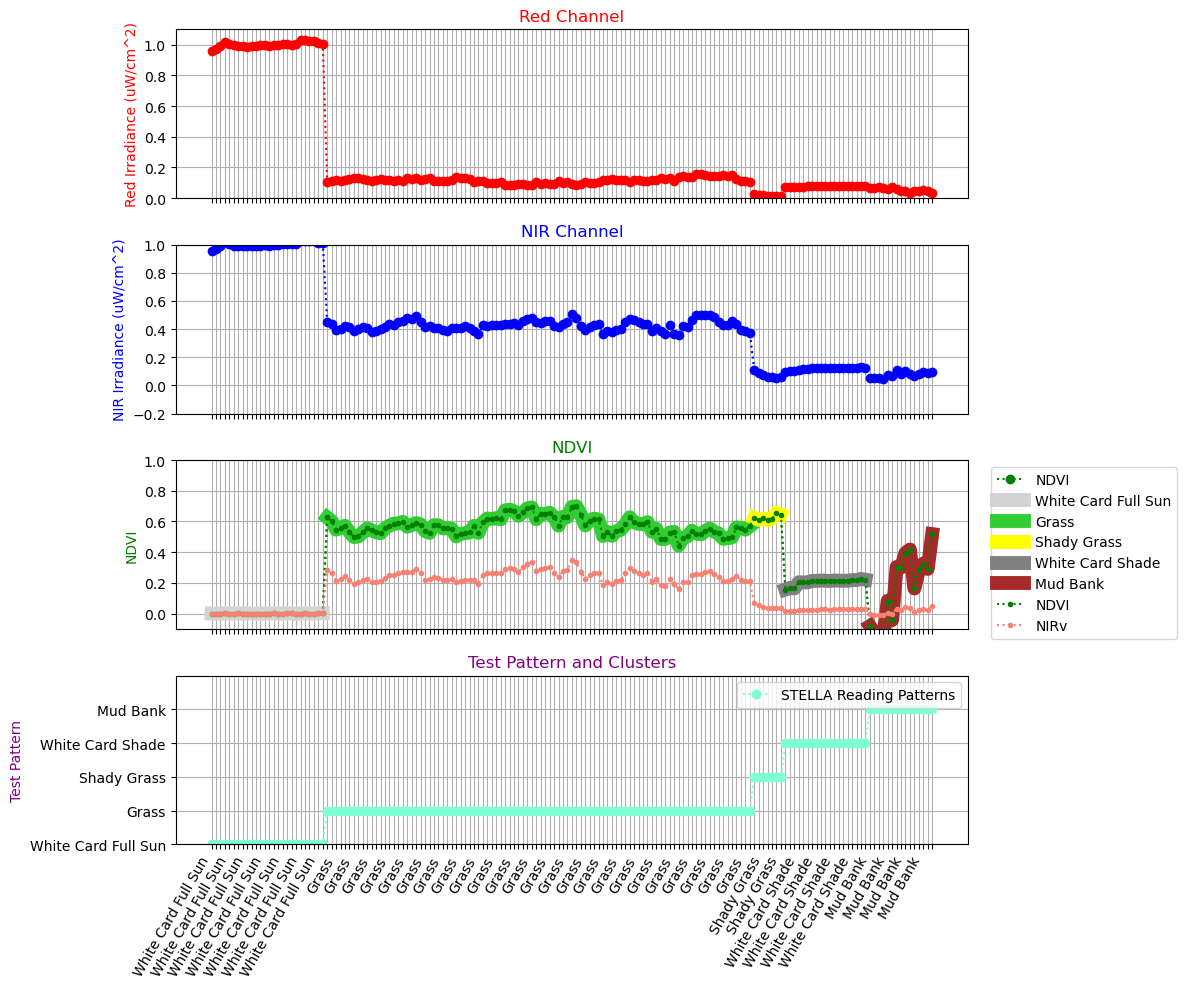

In [14]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)



# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(-0.2,1.)



# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
#axs[2].plot(df['NIRv'], marker='d', markersize =4,linestyle='dotted', color='purple', label = "NIRv")

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green' , label = "NDVI")
axs[2].plot(df['NIRv'], marker='o', markersize =3,linestyle='dotted', color='salmon' , label = "NIRv")
axs[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].set_ylim(-0.1,1.)
axs[2].grid()



axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='aquamarine',label="STELLA Reading Patterns")
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,5)
plt.legend()


# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 4 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')


'''
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


    # Set common xlabel
    #plt.xlabel('Timestamp (ISO8601)', color=color)
'''

# Set common xlabel
#plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()


**We can accurately predict all but part of the Shady White-Card and Mud Bank. They are both non-vegetative species.**